## EDA of Telecom Customer Churn Data

In [1]:
import numpy as np
import pandas as pd
import math
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

In [2]:
df=pd.read_csv("../input/telecom-users-dataset/telecom_users.csv")

In [3]:
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [4]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges = df.TotalCharges.replace(' ', np.NaN)
df = df.dropna()
df.TotalCharges = pd.to_numeric(df.TotalCharges)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Relationship of Churn and Charges

In [7]:
import plotly.express as px
fig = px.scatter(df, x="tenure", y="TotalCharges", color="Churn",
                 size='TotalCharges', hover_data=['tenure'], color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(title_text='Total Charge vs Tenure', template='ggplot2')

fig.update_xaxes(title_text="Tenure")

fig.update_yaxes(title_text="Total Charge")

fig.show()

In [8]:
import plotly.express as px
fig = px.scatter(df, x="tenure", y="MonthlyCharges", color="Churn",
                 size='TotalCharges', hover_data=['tenure'], color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title_text='Monthly Charge vs Tenure', template='ggplot2')

fig.update_xaxes(title_text="Tenure")

fig.update_yaxes(title_text="Monthly Charge")

fig.show()

## How many gender-based data-points do we have?

In [9]:
gender=df["gender"].value_counts().to_frame()
gender = gender.reset_index()

import plotly.express as px
fig = px.pie(gender, values='gender', names='index', color_discrete_sequence=px.colors.sequential.Reds)
fig.update_layout(title_text='Gender of the Clients', width=700,
    height=500, template='ggplot2')

fig.show()

## Clients' marital status

In [10]:
import plotly.graph_objects as go

ismarried=df['Partner'].value_counts()

x, y = ismarried.index, ismarried

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['27% market share', '24% market share', '19% market share'])])
# Customize aspect
fig.update_traces(marker_color='rgb(158,300,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Clients: married or unmarried?', width=600,
    height=500, template='ggplot2')
fig.show()

## How long the services are being used by the clients?

In [11]:
import plotly.express as px
import numpy as np

tenure = df['tenure']
# create the bins
counts, bins = np.histogram(tenure, bins=range(0,tenure.max(),5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'Tenure', 'y':'Count'})
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1, opacity=0.8)
fig.update_layout(title_text='How long the services are being used by the clients?', width=1000,
    height=500, template='ggplot2')
fig.show()

## Number of customers using mobiles

In [12]:
phone_services=df['PhoneService'].value_counts()
phone_services

Yes    5388
No      588
Name: PhoneService, dtype: int64

In [13]:
import plotly.express as px
import numpy as np

phone_services=df['PhoneService'].value_counts()

x, y = phone_services.index, phone_services

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['27% market share', '24% market share', '19% market share'])])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,280)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Number of customers using mobiles', width=600,
    height=500, template='ggplot2')
fig.show()

## What are the additional services being used by the customers?

In [14]:
df_ = pd.DataFrame()
df_['response'] = df.MultipleLines.unique().tolist()
other_servises = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies']

for i in other_servises:
    
    df_[i] = df[i].value_counts().values

In [15]:
df_

,response,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Yes,2843,2627,2982,2604,2639,2959,2388,2353
1,No,2545,2064,1709,2087,2052,1732,2303,2338
2,No phone service,588,1285,1285,1285,1285,1285,1285,1285


In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=2)

fig.add_trace(go.Bar(x=df_.response, y=df_.MultipleLines),row=1, col=1)
fig.add_trace(go.Bar(x=df_.response, y=df_.InternetService),row=1, col=2)
fig.add_trace(go.Bar(x=df_.response, y=df_.OnlineSecurity), row=2, col=1)
fig.add_trace(go.Bar(x=df_.response, y=df_.OnlineBackup),2, 2)
fig.add_trace(go.Bar(x=df_.response, y=df_.DeviceProtection), 3, 1)
fig.add_trace(go.Bar(x=df_.response, y=df_.TechSupport), 3, 2)
fig.add_trace(go.Bar(x=df_.response, y=df_.StreamingTV), 4, 1)
fig.add_trace(go.Bar(x=df_.response, y=df_.StreamingMovies), 4, 2)

# Update xaxis properties
fig.update_xaxes(title_text="MultipleLines", row=1, col=1)
fig.update_xaxes(title_text="InternetService", row=1, col=2)
fig.update_xaxes(title_text="OnlineSecurity", row=2, col=1)
fig.update_xaxes(title_text="OnlineBackup", row=2, col=2)
fig.update_xaxes(title_text="DeviceProtection", row=3, col=1)
fig.update_xaxes(title_text="TechSupport", row=3, col=2)
fig.update_xaxes(title_text="StreamingTV", row=4, col=1)
fig.update_xaxes(title_text="StreamingMovies", row=4, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)
fig.update_yaxes(title_text="Count", row=3, col=1)
fig.update_yaxes(title_text="Count", row=3, col=2)
fig.update_yaxes(title_text="Count", row=4, col=1)
fig.update_yaxes(title_text="Count", row=4, col=2)

fig.update_traces(marker_color='rgb(225,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, row=1, col=1)
fig.update_traces(marker_color='rgb(225,202,202)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, row=1, col=2)
fig.update_traces(marker_color='rgb(202,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, row=2, col=1)
fig.update_traces(marker_color='rgb(250,202,230)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, row=2, col=2)
fig.update_traces(marker_color='rgb(202,280,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, row=3, col=1)
fig.update_traces(marker_color='rgb(250,202,290)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, row=3, col=2)
fig.update_traces(marker_color='rgb(280,250,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, row=4, col=1)
fig.update_traces(marker_color='rgb(210,280,230)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, row=4, col=2)

# Update title and height
fig.update_layout(title_text="Customers who use additional services", height=1200, width=1000, template='ggplot2')

fig.update_layout(coloraxis=dict(colorscale='IceFire'), showlegend=False)
fig.show()

## Count of contract-lengths

In [17]:
contract=df['Contract'].value_counts()

x, y = contract.index, contract

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['27% market share', '24% market share', '19% market share'])])
# Customize aspect
fig.update_traces(marker_color='rgb(225,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Contracts vs Number of clients', width=600,
    height=500, template='ggplot2')
fig.show()

## Paperless Biling?

In [18]:
billing=df['PaperlessBilling'].value_counts()

x, y = billing.index, billing

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['27% market share', '24% market share', '19% market share'])])
# Customize aspect
fig.update_traces(marker_color='rgb(158,158,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Paperless Biling?', width=600,
    height=500, template='ggplot2')
fig.show()

## Payment methods used by the Clients

In [19]:
payment=df['PaymentMethod'].value_counts()

x, y = payment.index, payment

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['27% market share', '24% market share', '19% market share'])])
# Customize aspect
fig.update_traces(marker_color='rgb(158,222,158)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Clients using mode of payment', width=600,
    height=500, template='ggplot2')
fig.show()

## Monthly charges of the clients

In [20]:
charge=df['MonthlyCharges'].value_counts().to_frame()
charge = charge.reset_index()
charge.columns = ['Monthly Charge', 'MonthlyCharges']


fig = px.histogram(charge, x="Monthly Charge", y="MonthlyCharges",
                   marginal="box",
                   hover_data=charge.columns)

fig.update_traces(marker_color='rgb(158,225,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Monthly Payment Data', width=800,
    height=500, template='ggplot2')

fig.show()

## Corelation of the features

In [21]:
#Removing usless data
drop_elements=['Unnamed: 0','customerID','Churn']
train=df.drop(drop_elements, axis=1)
test=df['Churn']

In [22]:
# Label Encoding encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Multiple column label encoding with dtype = object
for i in train.columns:
    if 'object' in str(train[str(i)].dtype):
        train[str(i)] = train[str(i)].astype('category').cat.codes 

print(train.shape)
train.head()

(5976, 19)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50


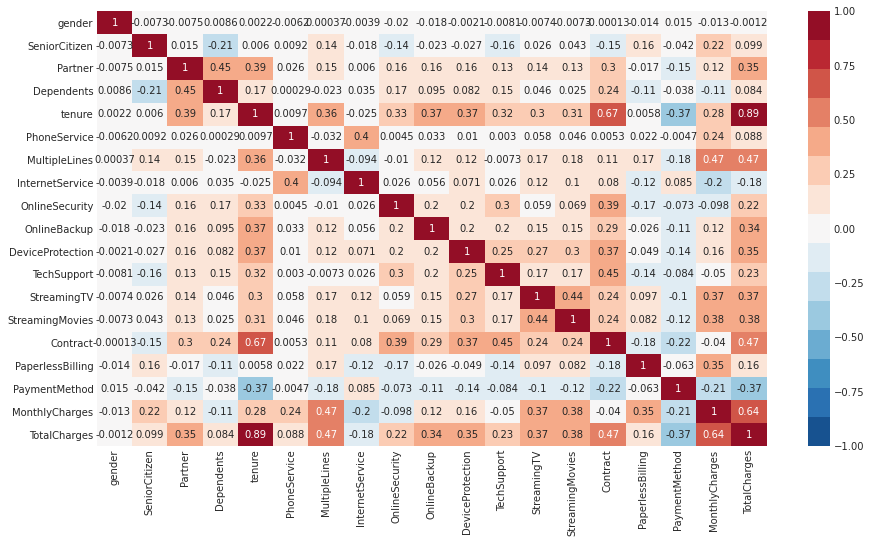

In [23]:
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

## Are the clients dependent or not?

In [24]:
depends=df['Dependents'].value_counts()

x, y = depends.index, depends

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['27% market share', '24% market share', '19% market share'])])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,202)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Dependents?', width=600,
    height=500, template='ggplot2')
fig.show()

## Clients who stream TV

In [25]:
streamingtv=df['StreamingTV'].value_counts()

x, y = streamingtv.index, streamingtv

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y)])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='No of Clients streaming TV', width=600,
    height=500, template='ggplot2')
fig.show()

## Clients who stream Movies

In [26]:
streamingmov=df['StreamingMovies'].value_counts()

x, y = streamingmov.index, streamingmov

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y)])
# Customize aspect
fig.update_traces(marker_color='rgb(158,158,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='No of Clients streaming Movies', width=600,
    height=500, template='ggplot2')
fig.show()

## Are they getting tech-support?

In [27]:
techsupport=df["TechSupport"].value_counts().to_frame()
techsupport = techsupport.reset_index()

import plotly.express as px
fig = px.pie(techsupport, values='TechSupport', names='index', color_discrete_sequence=px.colors.sequential.Blues)
fig.update_layout(title_text='Are clients getting tech support', width=700,
    height=500, template='ggplot2')

fig.show()

## Did the customer churn? :( 

In [28]:
churn=df['Churn'].value_counts().to_frame()
churn = churn.reset_index()


import plotly.express as px
fig = px.pie(churn, values='Churn', names='index', color_discrete_sequence=px.colors.sequential.Reds)
fig.update_layout(title_text='Are clients getting tech support', width=700,
    height=500, template='ggplot2')

fig.show()

In [29]:
tot_charge_gender = df.groupby('SeniorCitizen')['TotalCharges'].agg('mean')
tot_charge_gender

SeniorCitizen
0    2205.039970
1    2780.496894
Name: TotalCharges, dtype: float64

In [30]:
tot_charge_churn = df.groupby('Churn')['TotalCharges'].agg('mean')
tot_charge_churn

Churn
No     2568.294874
Yes    1550.701985
Name: TotalCharges, dtype: float64

## Realtionship of Churn and Total Charge

In [31]:
import plotly.graph_objects as go

y = tot_charge_churn.values.tolist()
x = tot_charge_churn.index.tolist()

# Create traces
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.add_trace(go.Scatter(x=x, y=y,
                    name='Total Charge vs Churn'))

fig.update_layout(title_text='Total Charge vs Churn', width=600,
    height=500, template='ggplot2')

fig.update_traces(marker_color='rgb(158,158,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_xaxes(title_text="Churned?")

fig.update_yaxes(title_text="Average Total Charge")


fig.show()

## Are the Senior Citizens paying the right amount?

In [32]:
import plotly.graph_objects as go

y = tot_charge_gender.values.tolist()
x = tot_charge_gender.index.tolist()

# Create traces
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.add_trace(go.Scatter(x=x, y=y,
                    name='Total Charge vs Senior Citizen'))

fig.update_layout(title_text='Total Charge vs Senior Citizen', width=600,
    height=500, template='ggplot2')

fig.update_traces(marker_color='rgb(158,158,158)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_xaxes(title_text="Senior Citizen?")
fig.update_yaxes(title_text="Average Total Charge")


fig.show()

## Relationship between Monthly & Total charges

In [33]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter(x=df.MonthlyCharges, y=df.TotalCharges, mode='markers', marker=dict(size=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                color=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))])
fig.update_layout(title_text='Monthly Charge vs Total Charge',
    height=500, template='ggplot2')

fig.update_xaxes(title_text="Monthly Charges")

fig.update_yaxes(title_text="Total Charge")

fig.show()

## Thank you for visiting! PLease upvote if you like it! 